In [1]:
from numpy.random import normal
from numpy import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# One Sample t-test

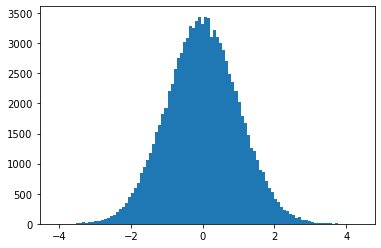

In [2]:
# This is the fake full distribution
popmean = 0
X = normal(popmean,1,100000)
plt.hist(X, bins = 100)
plt.show()

In [3]:
# Mean and std of the real distribution.
print(np.mean(X))
print(np.std(X))

-0.0023209436991204428
0.9970666725876468


In [6]:
# Random sample (x) with size 10.
x = random.choice(X, 10)

res = st.ttest_1samp(x, popmean = popmean)

print("p: {:5.2f}".format(res.pvalue))
print("t: {:5.2f}".format(res.statistic))

p:  0.05
t: -2.20


How do we report one sample t-test results : 
mean = -0.25, p = 0.03 < 0.05, t(9) = -1.41

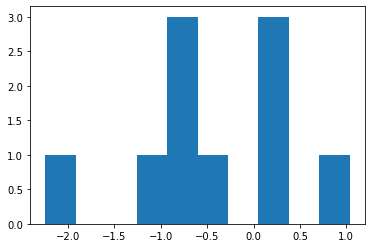

In [48]:
# Histogram of x.
plt.hist(x, bins = 10)
plt.show()

In [10]:
# mean andstd of x.
print(np.mean(x))
print(np.std(x))

-0.1132697781467257
1.0882530689235455


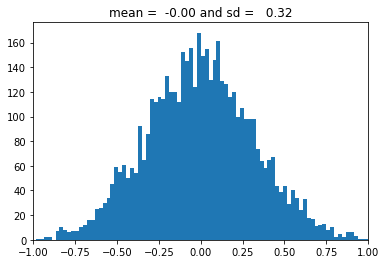

In [49]:
# rep: Replication
# n = sample size

rep = 5000
n = 10

x_means = np.zeros(rep)
# Loop for sam
for i in range(rep):
    x_means[i] = np.mean(random.choice(X, n))

plt.hist(x_means, bins = 100)
plt.title("mean =  {:5.2f} and sd =  {:5.2f}".format(np.mean(x_means),np.std(x_means)))
plt.xlim(-1, 1)
plt.show()


In [50]:
sd = 1
se = sd/np.sqrt(100)
print(se)

0.1


In [51]:
def mysampler(rep, n):
    x_means = np.zeros(rep)
    pvalues = np.zeros(rep)
    for i in range(rep):
        x_means[i] = np.mean(random.choice(X, n))        
    return x_means

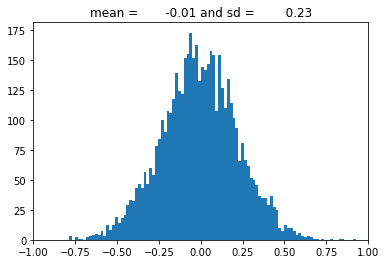

In [57]:
rep = 5000
n = 20

x_means = mysampler(rep, n)


plt.hist(x_means, bins = 100)
plt.title("mean =  {:10.2f} and sd =  {:10.2f}".format(np.mean(x_means),np.std(x_means)))
plt.xlim(-1,1)
plt.show()

3.0


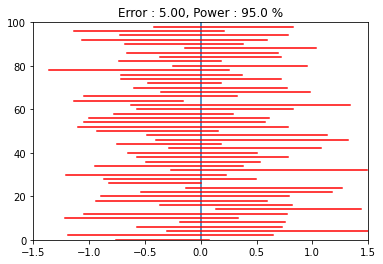

In [76]:
# sampling X returns mean and std.
def mysampler2(rep, n, conf = 0.95):
    x_means = np.zeros(rep)
    pvalues = np.zeros(rep)
    x_stds = np.zeros(rep)
    x_CI = np.zeros((rep ,2))
    for i in range(rep):
        x = random.choice(X, n)
        x_means[i] = np.mean(x)
        x_stds[i] = np.std(x)

        # Confidence Interval is calculated here.
        x_CI[i,0], x_CI[i,1] =  st.t.interval(conf, n-1, loc=np.mean(x), scale=st.sem(x))
        # Calculates p values of one sample t-test
        pvalues[i] = st.ttest_1samp(x, popmean = popmean).pvalue
    
    return x_CI,pvalues

def my_CIplot(ci, pvalues, conf = 0.95, effectsize = 0):
    plt.ylim(0, 2*50)
    plt.xlim(effectsize - 1.5  , effectsize + 1.5 )
    
    include_count = 0
    plst0_05 = 0
    altsinir = 0

    
    for i in range(len(ci)):
       
        # Guven araligi burda hesaplaniyor
        # d = s[i]*1.96/np.sqrt(n)
        
        xmin = ci[i,0]
        xmax = ci[i,1]

        if pvalues[i] < 1 - conf:
                plst0_05 +=1
        
        if xmin <= effectsize and xmax >= effectsize:
            include_count +=1

            if xmin > 0:
                altsinir +=1       

        # plotla iliskili
        x_coordinates = [xmin, xmax]
        y_coordinates = [2*i, 2*i]
        

        if i < 50:
            plt.plot(x_coordinates, y_coordinates ,color = 'r')
    pc = 100*include_count/len(ci)
    pv = 100*plst0_05/len(ci)
    print(100*altsinir/len(ci))
    plt.vlines(ymin=0, ymax = 2*len(ci), x = effectsize)
    plt.title(f"Error : {100 - pc:.2f}, Power : {100 - pv} %")
    plt.show()


n = 10
rep = 1000
ci, pvalues = mysampler2(rep, n)
my_CIplot(ci, pvalues = pvalues)



TYPE I Error : Etki yokken var bulmak (False Positive)
TYPE II Error : Etki varken bulamamak (False Negative)

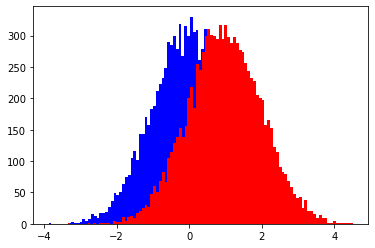

In [58]:
effectsize = 1

standart_deviation_ratio = 1
std_effectsize_ratio = 1

std1 = effectsize * std_effectsize_ratio
std2 = standart_deviation_ratio * std1

poulatiionsize = 10000
# This is the fake population1
X1 = normal(loc = 0,scale = std1,size = poulatiionsize) # loc: mean,std : scale
plt.hist(X1, bins = 100, color = 'b')
# This is the fake population 2
X2 = normal(effectsize,scale = std2,size = poulatiionsize)
plt.hist(X2, bins = 100, color = 'r')
plt.show()

In [60]:
def pooled_CI(x1, x2, conf = 0.95):

    n1 = len(x1)
    n2 = len(x2)
    SD1 = np.std(x1)
    SD2 = np.std(x2)

    pooled_sd = np.sqrt(((n1 - 1)*SD1 * SD1 + (n2-1)*SD2 * SD2) / (n1 + n2-2))
    
    SE_p = pooled_sd*np.sqrt(1/n1 + 1/n2)

    dof = n1 + n2 - 2
    x_CI1, x_CI2 =  st.t.interval(conf, dof, loc=np.mean(x2) - np.mean(x1), scale=SE_p)
    
    return x_CI1, x_CI2

    

60.0


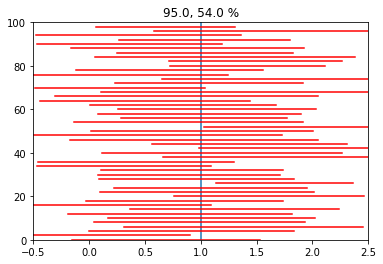

In [73]:

# sampling X returns m2ean and std.
def mysampler_twosample(rep, n1, n2 = None, conf = 0.95):
    
    if n2 is None:
        n2 = n1 

    pvalues = np.zeros(rep)
    x_CI = np.zeros((rep ,2))
    x_CI = np.zeros((rep ,2))
    for i in range(rep):
        x1 = random.choice(X1, n1)
        x2 = random.choice(X2, n2)
        
        # Confidence Interval is calculated here.
        x_CI[i,0], x_CI[i,1] = pooled_CI(x1, x2, conf = conf)
        pvalues[i] = st.ttest_ind(x1, x2,equal_var=True).pvalue        

    return x_CI,  pvalues

n1 = 10
n2 = 10
rep = 100
ci,pvs = mysampler_twosample(rep, n1, n2)
my_CIplot(ci, pvs,effectsize=effectsize)

# effectsize : dagilim ortalamalri arasindaki fark.



In [62]:
def welch_dof(x,y):
        SD1_2 = np.std(x)**2
        SD2_2 = np.std(y)**2

        n1 = len(x)
        n2 = len(y)

        dof = (SD1_2**2/n1 + SD2_2/n2)**2 / ((SD1_2/n1)**2 / (n1 - 1) + (SD2_2/n2)**2 / (n2 - 1))
        return dof


def welsch_CI(x1, x2, conf = 0.95):

    n1 = len(x1)
    n2 = len(x2)
    SD1 = np.std(x1)
    SD2 = np.std(x2)

    pooled_sd = np.sqrt(((n1 - 1)*SD1 * SD1 + (n2-1)*SD2 * SD2) / (n1 + n2-2))
    
    SE_p = np.sqrt(SD1**2/n1 + SD1**2/n2)

    dof = welch_dof(x1,x2)   

    #print(dof) 
    
    x_CI1, x_CI2 =  st.t.interval(conf, dof, loc=np.mean(x2) - np.mean(x1), scale=SE_p)
    
    return x_CI1, x_CI2

def mysampler_twosample_welsch(rep, n1, n2 = None, conf = 0.95):
    if n2 is None:
        n2 = n1 
    x_CI = np.zeros((rep ,2))
    for i in range(rep):
        x1 = random.choice(X1, n1)
        x2 = random.choice(X2, n2)
                        
        # Confidence Interval is calculated here.
        x_CI[i,0], x_CI[i,1] = welsch_CI(x1, x2, conf = 0.95)

    return x_CI

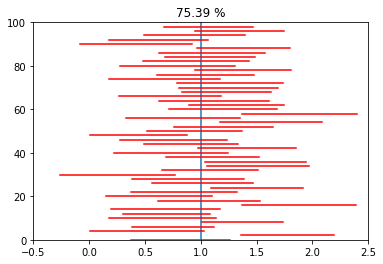

In [63]:
n1 = 50
n2 = 30
rep = 10000
ci = mysampler_twosample_welsch(rep, n1, n2)
my_CIplot(ci, effectsize=effectsize)